# **Statistics for Regression**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

## **Simple linear regression**

In [2]:
import yfinance as yf
netflix = yf.Ticker("NFLX")
start = "2016-01-01"
end = "2018-01-01"
df = netflix.history(interval="1d",start = start,end = end)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-01-04,109.000000,110.000000,105.209999,109.959999,20794800,0,0
2016-01-05,110.449997,110.580002,105.849998,107.660004,17664600,0,0
2016-01-06,105.290001,117.910004,104.959999,117.680000,33045700,0,0
2016-01-07,116.360001,122.180000,112.290001,114.559998,33636700,0,0
2016-01-08,116.330002,117.720001,111.099998,111.389999,18067100,0,0
...,...,...,...,...,...,...,...
2017-12-22,188.330002,190.949997,186.800003,189.940002,3878900,0,0
2017-12-26,189.779999,189.940002,186.399994,187.759995,3045700,0,0
2017-12-27,187.800003,188.100006,185.220001,186.240005,4002100,0,0


In [3]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

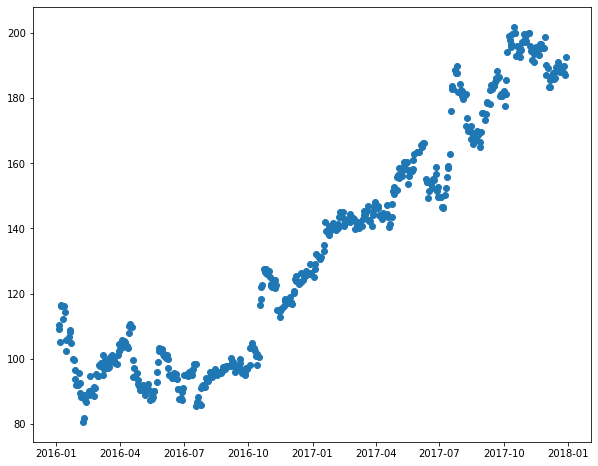

In [4]:
plt.figure(figsize=(10,8))
plt.scatter(df.index, df["Open"]);

In [5]:
x = (df.index - df.index[0]).days.to_numpy()
y = df.Open.to_numpy()

### **LSE Linear Regression and Decomposition of Variance**

In [6]:
from scipy.stats import linregress
linregress(x,y)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


LinregressResult(slope=0.1621439438895901, intercept=74.8381617848928, rvalue=0.9447803138300889, pvalue=6.80727064569403e-245, stderr=0.002512657395050035, intercept_stderr=1.0530640682445587)

### **Coefficient of determination**

In [7]:
linregress(x,y)[2]**2

0.8926098414008812

### **Total variance of dependent variables**

In [8]:
np.var(y)*len(y)

653922.6311388048

653922.6311388055


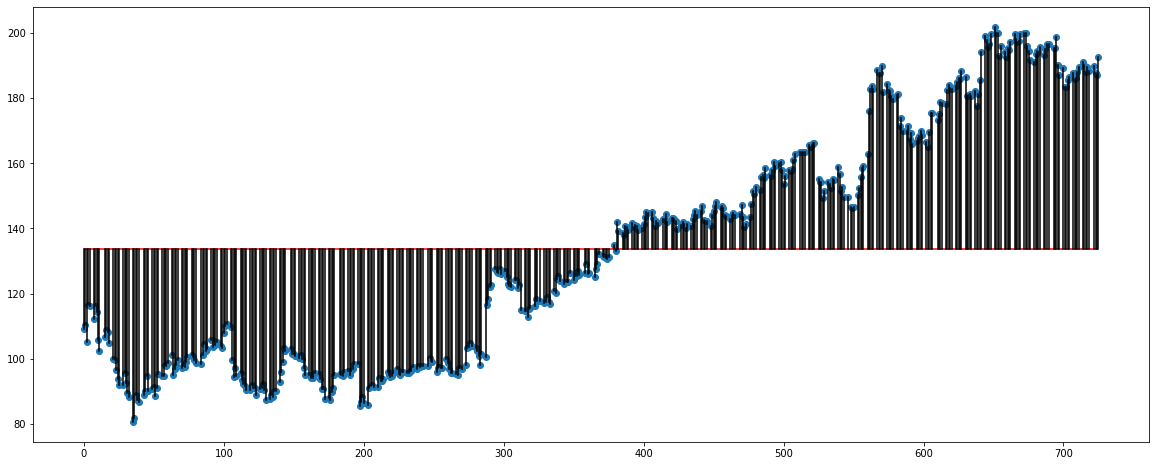

In [9]:
plt.figure(figsize=(20,8))
plt.scatter(x, y)
y_mean = np.mean(y)
plt.hlines(y_mean, np.min(x), np.max(x),color="r")
sst = 0
for x_, y_ in zip(x,y):
    plt.plot([x_,x_],[y_mean,y_],color="black",linestyle="-")
    sst += (y_ - y_mean)**2
print(sst)

In [10]:
def x_2_y(slope, x, y, x_in):
    """
    return the y value on the straight line defined by the slope and point (x,y)
    """
    return y + slope*(x_in - x)

155964.99688463015


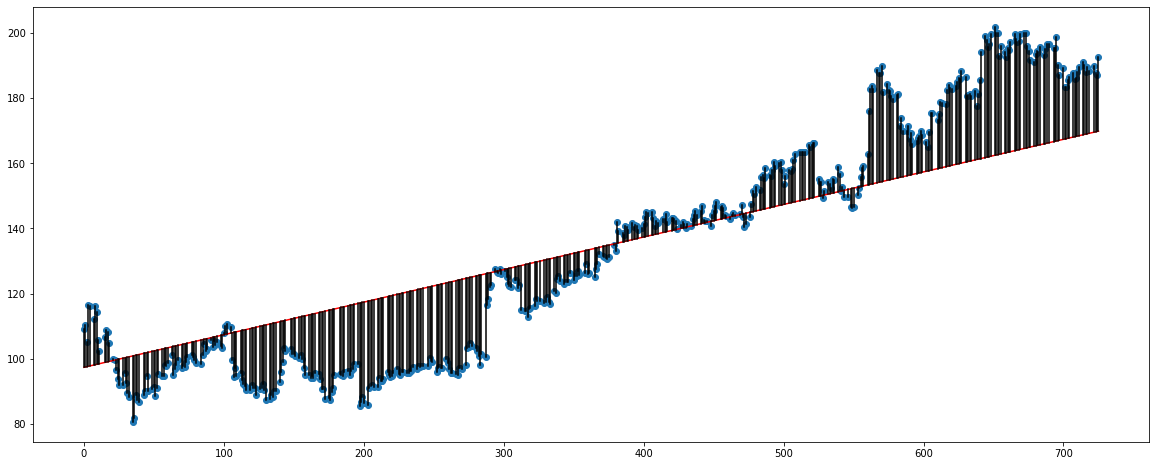

In [11]:
plt.figure(figsize=(20,8))
plt.scatter(x, y)
y_mean = np.mean(y)
x_mean = np.mean(x)
plt.plot([np.min(x),np.max(x)], 
         [x_2_y(0.1,x_mean,y_mean,np.min(x)),x_2_y(0.1,x_mean,y_mean,np.max(x)),],
         color="r")
sse = 0
for x_, y_ in zip(x,y):
    y_on_line = x_2_y(0.1,x_mean,y_mean,x_)
    plt.plot([x_,x_],[y_on_line,y_],color="black",linestyle="-")
    sse += (y_on_line - y_)**2
print(sse)

### **SSE VS slope**

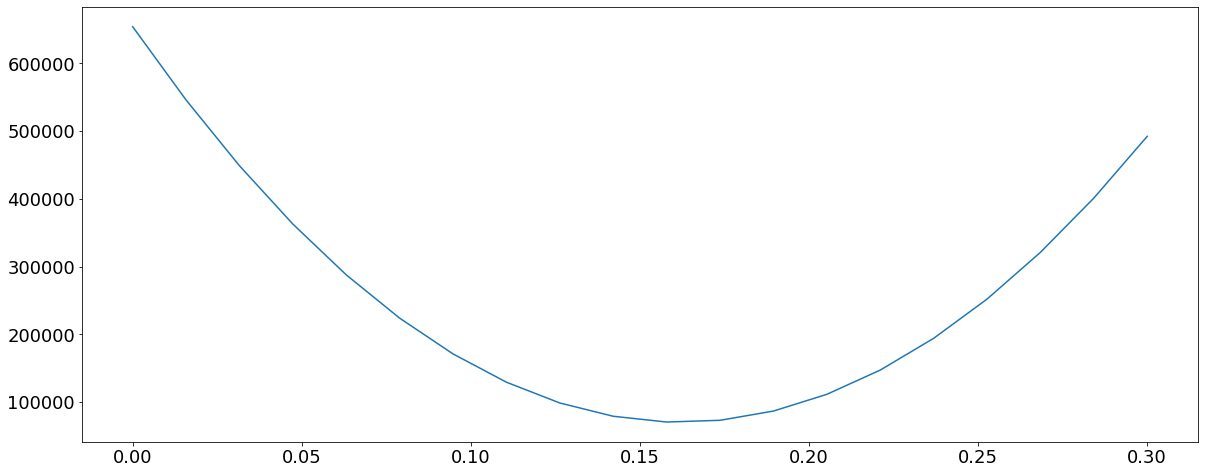

In [12]:
y_mean = np.mean(y)
x_mean = np.mean(x)
slopes = np.linspace(0,0.3,20)
sses = [0 for i in range(len(slopes))]
for x_, y_ in zip(x,y):
    for i in range(len(sses)):
        y_on_line = x_2_y(slopes[i],x_mean,y_mean,x_)
        sses[i] += (y_on_line - y_)**2

plt.figure(figsize=(20,8))
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
plt.plot(slopes,sses);

### **3D visualization, considering both slope and intercept**

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [14]:
def cal_sse(slope,intercept, x, y):
    sse = 0
    for x_, y_ in zip(x,y):
        y_on_line = x_2_y(slope,0,intercept,x_)
        sse += (y_on_line - y_)**2
    return sse

slopes = np.linspace(-1,1,20)
intercepts = np.linspace(-200,400,20)
slopes, intercepts = np.meshgrid(slopes,intercepts)
sses = np.zeros(intercepts.shape)
for i in range(sses.shape[0]):
    for j in range(sses.shape[1]):
        sses[i][j] = cal_sse(slopes[i][j],intercepts[i][j],x,y)

/tmp/ipykernel_91/2645927998.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


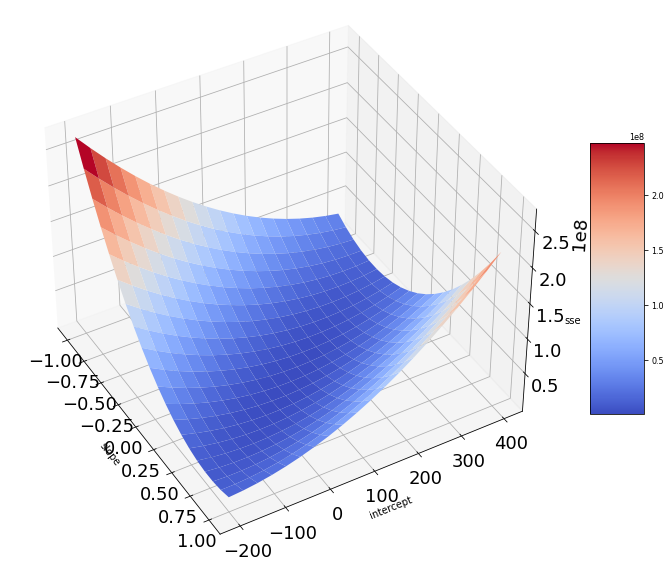

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

fig = plt.figure(figsize=(14,10))
ax = fig.gca(projection='3d')
ax.view_init(40, -30)
ax.set_xlabel("slope")
ax.set_ylabel("intercept")
ax.set_zlabel("sse")
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
surf = ax.plot_surface(slopes, intercepts, sses, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

### **Notes on R^2**
#### **Influence of Outlier**

LinregressResult(slope=2.181038442360317, intercept=0.9204244764964242, rvalue=0.5138891687655077, pvalue=0.01717156649964954, stderr=0.835279351538711, intercept_stderr=0.9535576827201881)

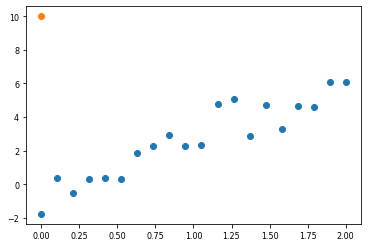

In [16]:
np.random.seed(2020)
x = np.linspace(0,2,20)
y = 3*x + np.random.normal(size=len(x))
x_new = np.append(x,np.array([0]))
y_new = np.append(y,np.array([10]))
plt.scatter(x,y)
plt.scatter([0],[10])
linregress(x_new,y_new)

LinregressResult(slope=3.413266549121516, intercept=-0.7657824064399539, rvalue=0.9340376682483343, pvalue=1.7645498128072767e-09, stderr=0.30764511604564365, intercept_stderr=0.35988181196603514)

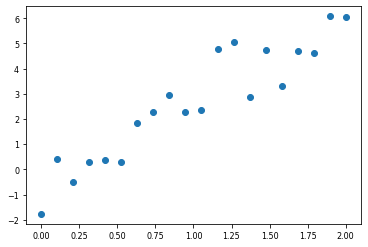

In [17]:
plt.scatter(x,y)
linregress(x,y)

#### **Small R^2 may indicate you are using the wrong model from first place.** 

LinregressResult(slope=0.20663327456075753, intercept=-2.909206992693661, rvalue=0.09888652796032295, pvalue=0.6783044219743989, stderr=0.4901094122156666, intercept_stderr=0.5733276887243475)

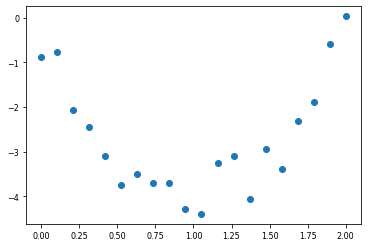

In [18]:
np.random.seed(2020)
x = np.linspace(0,2,20)
y = 4*x**2-8*x + np.random.normal(scale=0.5,size=len(x))
plt.scatter(x,y)
linregress(x,y)

## **Linear Regression and Estimator**

In [19]:
x= (df.index - df.index[0]).days.to_numpy()
y = df.Open.to_numpy()
x_mean = np.mean(x)
y_mean = np.mean(y)
k = np.sum((x-x_mean)*(y-y_mean))/np.sum((x-x_mean)**2)
b = y_mean - k * x_mean
print(k,b)

0.16214394388959058 74.83816178489263


# **Multivariate Linear Regression and Collinearity Analysis**

In [20]:
import pandas as pd
exam = pd.read_csv("exams.csv")

In [21]:
exam.head()

,EXAM1,EXAM2,EXAM3,FINAL
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


In [22]:
exam["index"] = exam.index
exam_long = pd.melt(exam,id_vars=["index"],value_vars = exam.columns[:-1])[["variable","value"]]
exam_long.columns = ["exam_name","score"]

In [23]:
exam_long.sample(10)

,exam_name,score
53,EXAM3,100
56,EXAM3,77
31,EXAM2,74
57,EXAM3,60
4,EXAM1,73
67,EXAM3,93
51,EXAM3,93
95,FINAL,177
29,EXAM2,66
92,FINAL,183


### **Violin-plot**

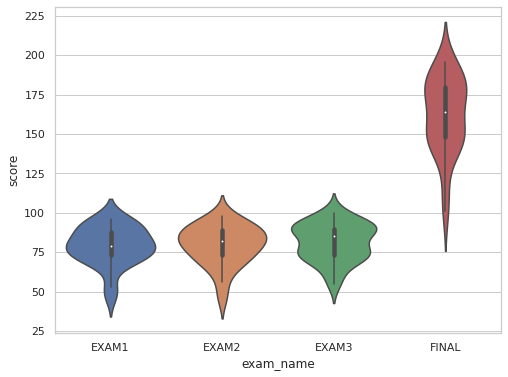

In [24]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
sns.violinplot(x="exam_name", y="score", data=exam_long);

### **Scatter plot**

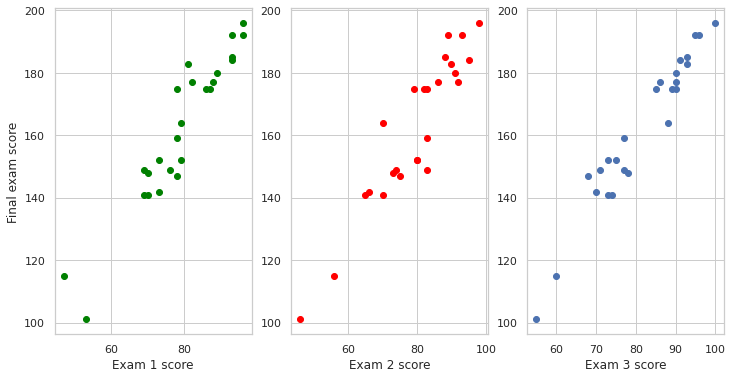

In [25]:
fig, ax = plt.subplots(1,3,figsize=(12,6))
ax[0].scatter(exam.EXAM1,exam.FINAL,color="green")
ax[1].scatter(exam.EXAM2,exam.FINAL,color="red")
ax[2].scatter(exam.EXAM3,exam.FINAL)
ax[0].set_xlabel("Exam 1 score")
ax[1].set_xlabel("Exam 2 score")
ax[2].set_xlabel("Exam 3 score")
ax[0].set_ylabel("Final exam score");

### **Covariance matrix**

In [27]:
exam[["EXAM1","EXAM2","EXAM3"]].corr()

,EXAM1,EXAM2,EXAM3
EXAM1,1.000000,0.901363,0.892743
EXAM2,0.901363,1.000000,0.846359
EXAM3,0.892743,0.846359,1.000000


In [28]:
linregress(exam.EXAM1, exam.FINAL)

LinregressResult(slope=1.8524548489068682, intercept=15.621968742401123, rvalue=0.946070831810203, pvalue=9.543660489161313e-13, stderr=0.13226692073027232, intercept_stderr=10.574804419047473)

In [29]:
linregress(exam.EXAM2, exam.FINAL)

LinregressResult(slope=1.7873376969490227, intercept=19.98239984649166, rvalue=0.9294714401508717, pvalue=1.9238076314221714e-11, stderr=0.14791367676877226, intercept_stderr=11.895018875626471)

## **Lasso Regression and Regularization**

In [39]:
from sklearn import linear_model
X = exam[["EXAM1","EXAM2","EXAM3"]].to_numpy()
y = exam["FINAL"].to_numpy()

In [40]:
alpha = 0.1
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X,y)
lasso_regressor = linear_model.Lasso(alpha=alpha)
lasso_regressor.fit(X,y)
ridge_regressor = linear_model.Ridge(alpha=alpha*len(y)*2)
ridge_regressor.fit(X,y)
print("linear model coefficient: ", linear_regressor.coef_)
print("lasso model coefficient: ", lasso_regressor.coef_)
print("ridge model coefficient: ", ridge_regressor.coef_)

linear model coefficient:  [0.35593822 0.54251876 1.16744422]
lasso model coefficient:  [0.35537305 0.54236992 1.16735218]
ridge model coefficient:  [0.3609811  0.54233219 1.16116573]


### **coefficient magnitude versus regularization coefficient**

In [41]:
X = exam[["EXAM1","EXAM2","EXAM3"]].to_numpy()
y = exam["FINAL"].to_numpy()
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X,y)
linear_coefficient = np.array([linear_regressor.coef_] * 20).T
lasso_coefficient = []
ridge_coefficient = []
alphas = np.linspace(1,400,20)
for alpha in alphas:
    lasso_regressor = linear_model.Lasso(alpha=alpha)
    lasso_regressor.fit(X,y)
    ridge_regressor = linear_model.Ridge(alpha=alpha*len(y)*2)
    ridge_regressor.fit(X,y)
    lasso_coefficient.append(lasso_regressor.coef_)
    ridge_coefficient.append(ridge_regressor.coef_)
lasso_coefficient = np.array(lasso_coefficient).T
ridge_coefficient = np.array(ridge_coefficient).T 

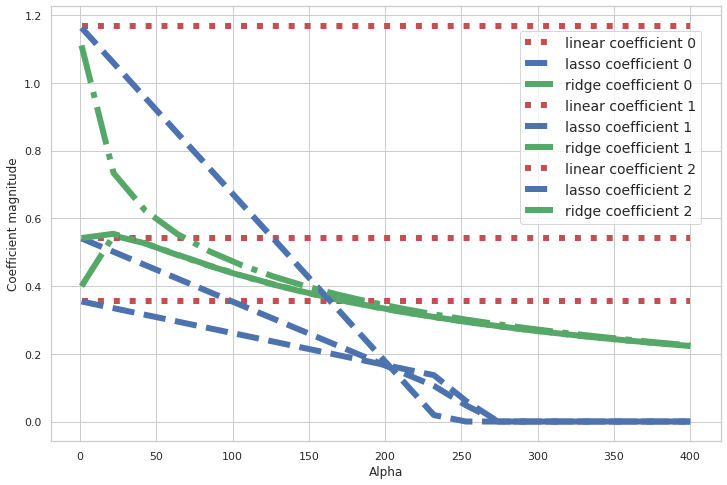

In [42]:
plt.figure(figsize=(12,8))
for i in range(3):
    plt.plot(alphas, linear_coefficient[i], label = "linear coefficient {}".format(i), 
             c="r", linestyle=":",linewidth=6)
    plt.plot(alphas, lasso_coefficient[i], label = "lasso coefficient {}".format(i), 
             c= "b",linestyle="--",linewidth=6)
    plt.plot(alphas, ridge_coefficient[i], label = "ridge coefficient {}".format(i),
             c="g",linestyle="-.",linewidth=6)
plt.legend(loc=(0.7,0.5),fontsize=14)
plt.xlabel("Alpha")
plt.ylabel("Coefficient magnitude");